In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os

In [4]:
# import pathlib
# train_data_dir = pathlib.Path('dataset/train/')
# train_data_dir

In [5]:
# list(train_data_dir.glob('*/*.jpg'))

In [6]:
# image_count = len(list(train_data_dir.glob('*/*.jpg')))
# print(image_count)

In [7]:
# id_card_dict = {
#     'id': list(train_data_dir.glob('id/*')),
#     'not_id': list(train_data_dir.glob('not_id/*')),
# }

In [8]:
# id_card_labels_dict = {
#     'id': 0,
#     'not_id': 1,
# }

In [9]:
# X, y = [], []

# for id_name, images in id_card_dict.items():
#     for image in images:
#         img = cv2.imread(str(image))
#         resized_img = cv2.resize(img,(1029, 644))
#         X.append(resized_img)
#         y.append(id_card_labels_dict[id_name])

In [10]:
# X = np.array(X)
# y = np.array(y)

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from platform import python_version

print(python_version())

3.8.8


In [13]:
print(tf. __version__)

2.5.0


In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [16]:
tf.test.is_built_with_cuda()

True

In [17]:
# X_train_scaled = X_train / 255
# X_test_scaled = X_test / 255

In [51]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [52]:
train_dataset = train.flow_from_directory('dataset/train/', 
                                          target_size=(1029, 644), 
                                          batch_size = 3, 
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('dataset/validation/', 
                                          target_size=(1029, 644), 
                                          batch_size = 3, 
                                          class_mode = 'binary')

Found 65 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [53]:
train_dataset.class_indices

{'id': 0, 'not_id': 1}

In [54]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(644, 
                                                              1029,
                                                              3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [32]:
model = tf.keras.models.Sequential([
    data_augmentation,
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    #
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPool2D(),
    #
    layers.Conv2D(32 ,3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    ##
    layers.Flatten(),
    ##
    layers.Dense(10,activation='relu'),
    ##
    layers.Dense(1,activation='sigmoid')
])

In [38]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit_generator(train_dataset,steps_per_epoch=10, validation_data=validation_dataset,epochs=5)

Epoch 1/5
10/10 [==============================] - 8s 757ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 8s 779ms/step - loss: 0.4820 - accuracy: 0.8966 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 9s 877ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 9s 839ms/step - loss: 0.3688 - accuracy: 0.9333 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 8s 828ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


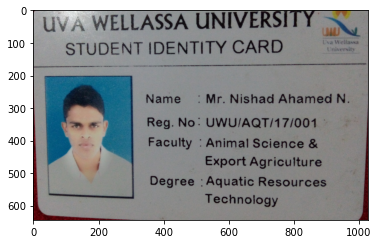

id card


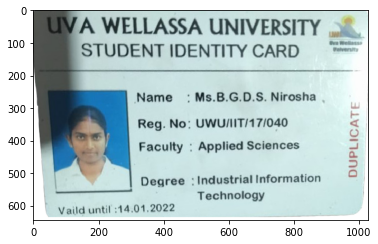

id card


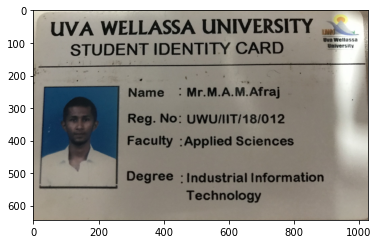

id card


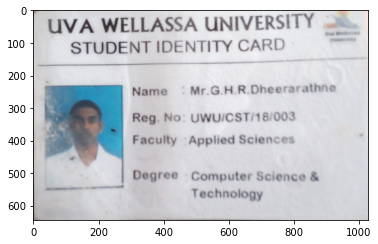

id card


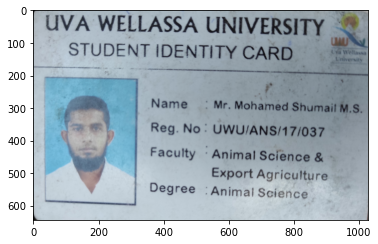

id card


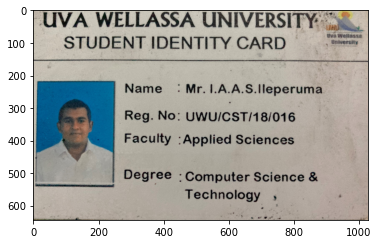

id card


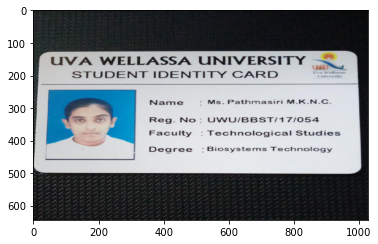

id card


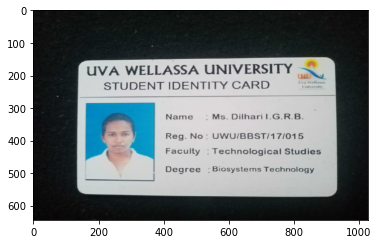

id card


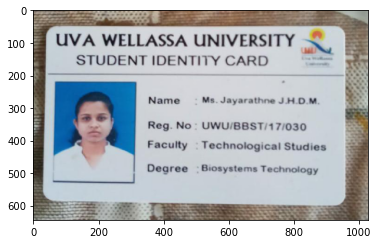

id card


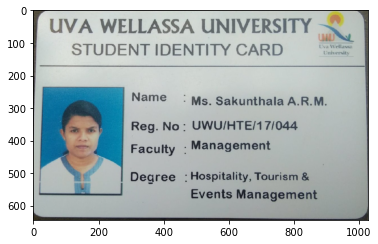

id card


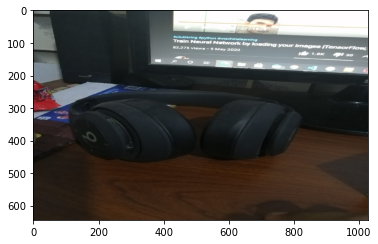

not a id card


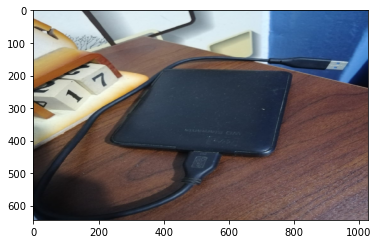

not a id card


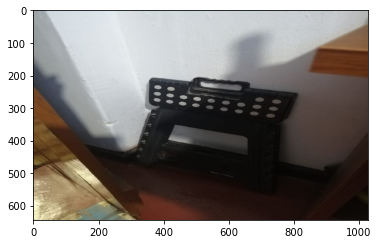

not a id card


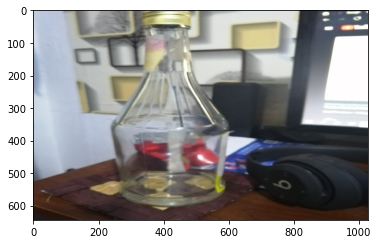

not a id card


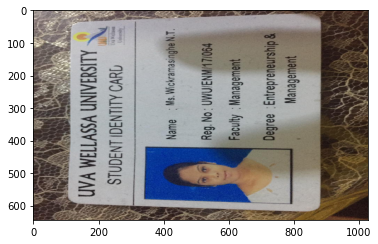

not a id card


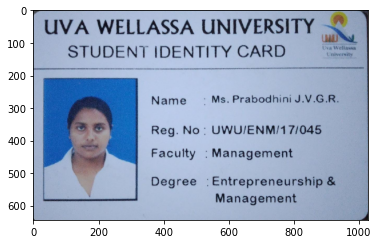

id card


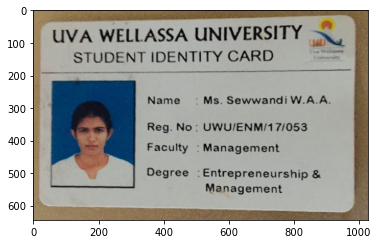

id card


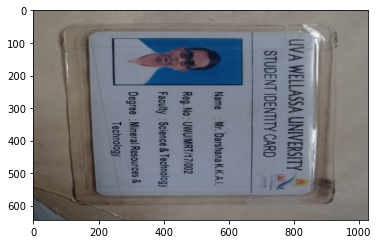

id card


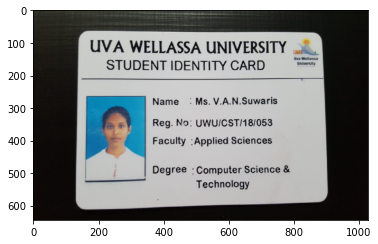

id card


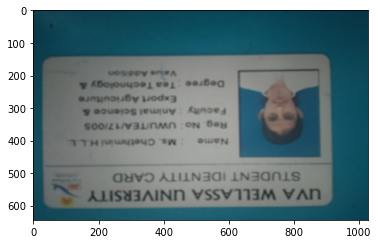

id card


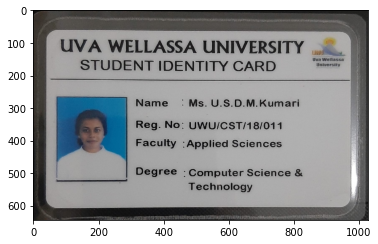

id card


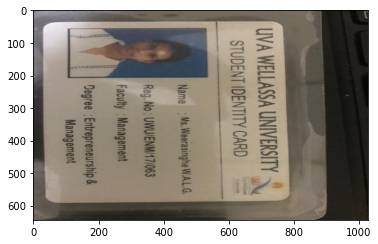

id card


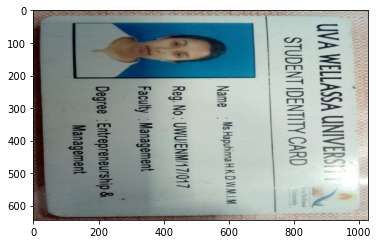

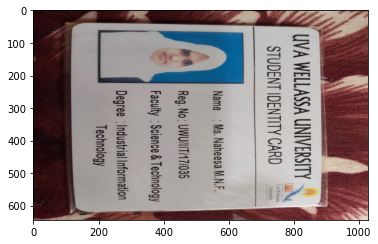

not a id card


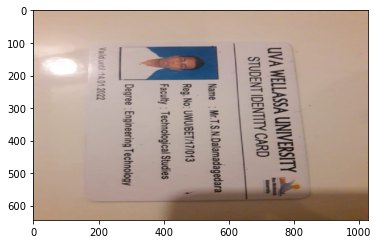

not a id card


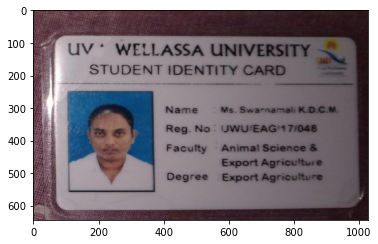

id card


In [49]:
dir_path = 'dataset/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(644, 1029))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("id card")
    elif val == 1:
        print("not a id card")

In [45]:
import joblib

In [46]:
# joblib.dump(model,'id_card_detector')

In [60]:
model.save('id_card_detection2')

INFO:tensorflow:Assets written to: id_card_detection2\assets


In [61]:
md =  tf.keras.models.load_model('id_card_detection2')

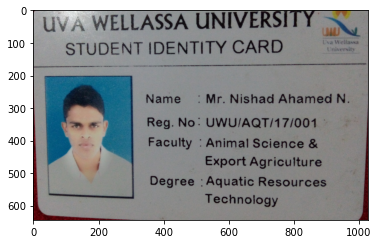

id card


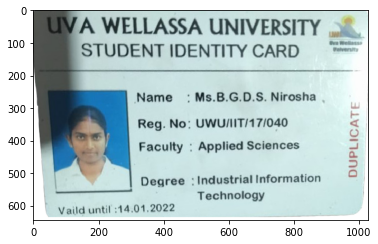

id card


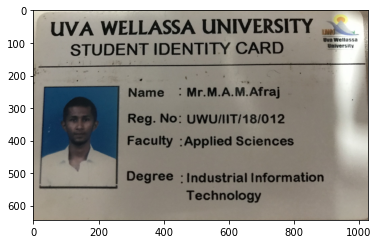

id card


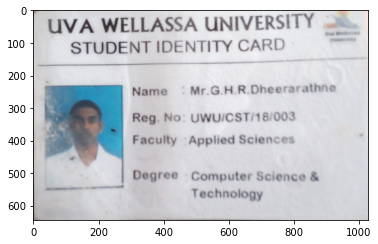

id card


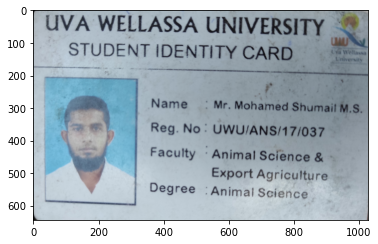

id card


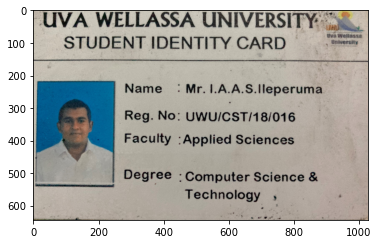

id card


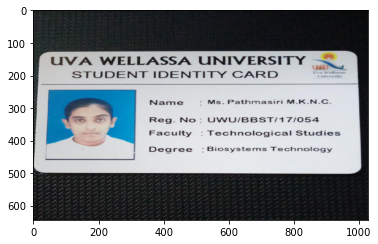

id card


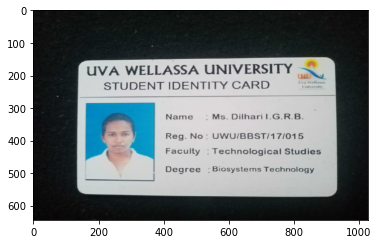

id card


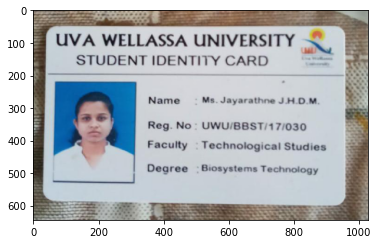

id card


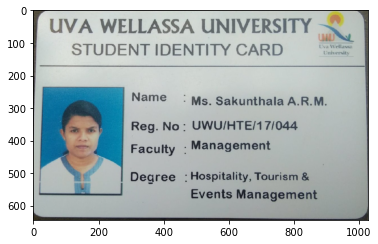

id card


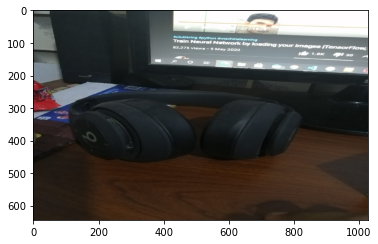

not a id card


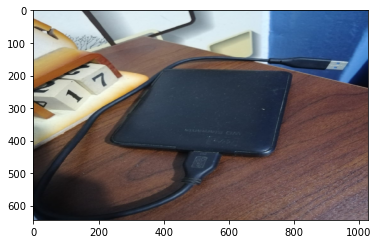

not a id card


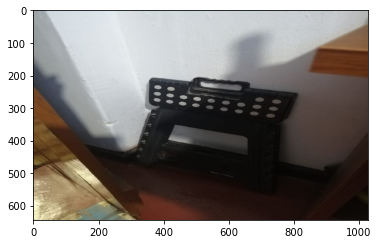

not a id card


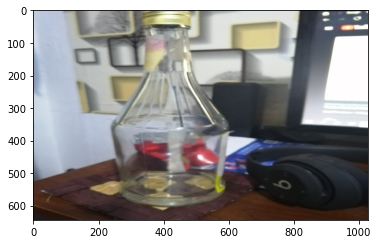

not a id card


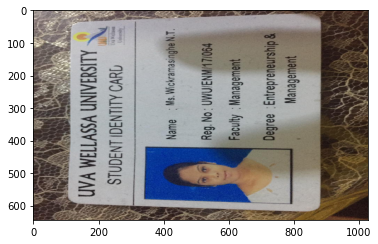

not a id card


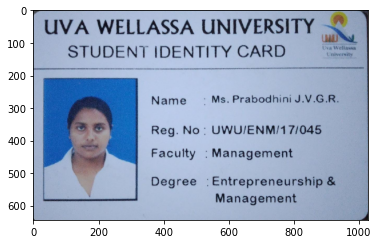

id card


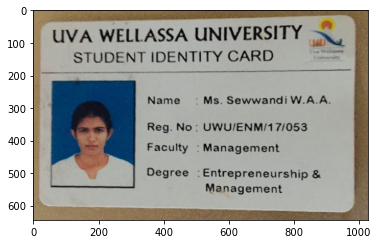

id card


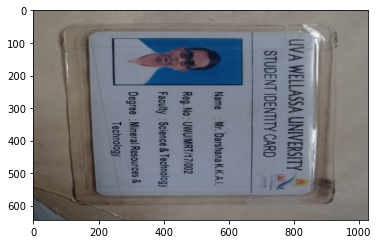

id card


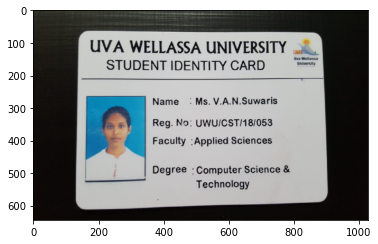

id card


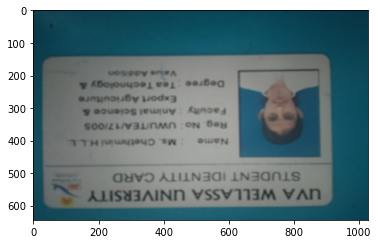

id card


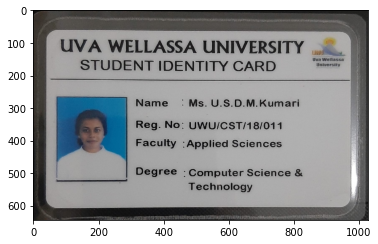

id card


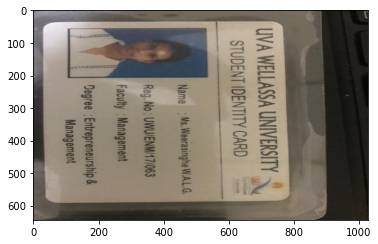

id card


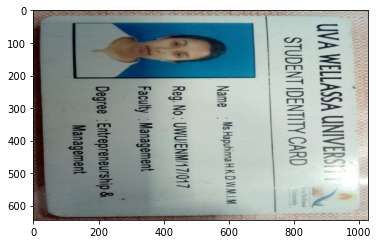

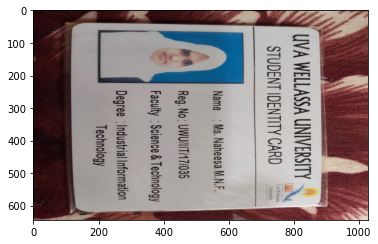

not a id card


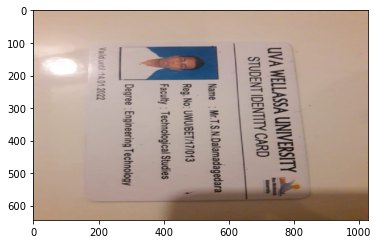

not a id card


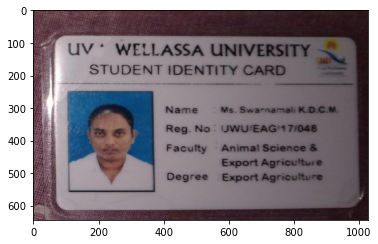

id card


In [62]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(644, 1029))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis =0)
    images = np.vstack([x])
    val = md.predict(images)
    if val == 0:
        print("id card")
    elif val == 1:
        print("not a id card")

id card


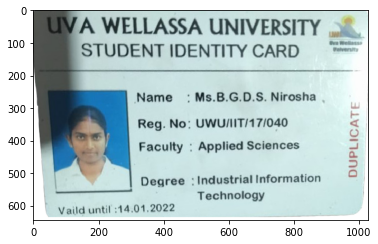

In [63]:
img = image.load_img(dir_path+'//'+ '23.png',target_size=(644, 1029))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
images = np.vstack([x])
val = md.predict(images)
if val == 0:
    print("id card")
elif val == 1:
    print("not a id card")